# Julia Tutorial of Data Analysis in Oceanography

* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets
* Other programming language similar to Julia are Matlab and Python
   * Unlike Python, Julia is build from the ground for techical computing
   * Unlike Matlab, julia is free and open-source software

* Note that Julia and IJulia is already installed on the machines of the computer room
* If you want to install Julia on your laptop later on, here are some instructions

## Instructions for installing Julia on your Laptop

* Go to http://julialang.org/downloads/
* Install also a text editor with support for Julia (like atom, notepad++, emacs...)
* Julia modules for this lecture can be installed by the following commands:

```julia
Pkg.add("DataArrays")
Pkg.add("NetCDF")
Pkg.add("PyPlot")
Pkg.add("PyCall")
```

### Optionally

* Install `IJulia` which also installs Jupyter http://jupyter.org/


* [Keyboard short cuts](https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/)
* General documentation of [Jupyter Notebooks](http://jupyter-notebook.readthedocs.io)



# First steps in Julia


* Download the zip file at http://tinyurl.com/julia-tutorial
* Uncompress the zip file (remember the location of the folder `JuliaTutorial-master`)

* Download and decompress the file at http://gher-diva.phys.ulg.ac.be/MatlabOctaveTutorial/data/WesternMedSST.nc.gz and place the uncompressed file in the directory `JuliaTutorial-master`

* Open a terminal. This is how the terminal icon looks like: ![icon](https://cdn.rawgit.com/Alexander-Barth/JuliaTutorial/master/img/gnome-terminal.svg)
* Go to the directory `JuliaTutorial-master`, for example by using the command
```bash
cd Downloads/JuliaTutorial-master
```
(if `JuliaTutorial-master` was extracted in the `Downloads` folder.)

* Launch Jupyter from the terminal with the command:

```bash
jupyter notebook julia-starter.ipynb
``` 


## Numbers

* Use a dot (.) as decimal separator (e.g. 3.14 and not 3,14)
* You can use the scientific notation $a \times 10^{-b}$ using the e-notation. (e.g. $3 \times10^{-7}$ becomes 3e-7) 
* Use Julia as a calculator:

In [1]:
2*2 + (3 + 5)/2

8.0

* The usual operator precedence applies


## Useful constants

Various constants are also pre-defined: π (pi), e (Euler's number), im (the imaginary number), Inf (Infinity, result from e.g. 1/0) and NaN (Not a Number - result from e.g. 0/0)

NaN is very special: 
* NaN plus any number is NaN

In [2]:
NaN + 1

NaN

* NaN is not equal to itself

In [3]:
NaN == NaN

false

In [4]:
isnan(NaN)

true

## Variables

* Numbers (and any other data type) can be put into variables
* The value of a variable is referenced by its name
* A variable name can be composed by letters (a-z and A-Z, including greek letters, accents,...), numbers (0-9) and underscore (_). The first character cannot be a number.

* Example:

In [5]:
temp = 21

21

* The variable `temp` has now the value 21. The value of the variable can be changed later on.
* An assignment without a final semicolon echos its value to the screen
* Careful: the value of constants can be overwritten. The following is allowed but not encouraged:
    	
    pi = 3;

* The command whos() lists the currently defined variables and their size. 

## Strings

* Delimited by double quotes
    	

In [6]:
s = "Hello world"
print(s)

Hello world

* How to use a double quote in a string? -> place a backslash in front:

In [7]:
s = "The letter \"A\" is the first letter of the alphabet."
print(s)

The letter "A" is the first letter of the alphabet.

## Vectors and matrices

* Vectors are list of numbers. The column vector $\left(\begin{array}{c}1 \\ 2 \\ 3 \end{array} \right)$ is represented by:

In [8]:
[1,2,3]

3-element Array{Int64,1}:
 1
 2
 3

* Matrices are tables of numbers. Rows are separated by a semicolon. The matrix 
$\left(\begin{array}{cc}1 & 2 \\ 3 & 4 \end{array} \right)$ is represented by:

In [9]:
[1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

* There are no "row vectors", just matrices with one row:

In [10]:
[1 2 3]

1×3 Array{Int64,2}:
 1  2  3

### Ranges

* Consecutive elements can be written as

    first:step:last
    
* or simply, if the step is 1,
    	
    first:last
    
* Use the function `collect` or `[first:step:last;]` to transform a range into a vector:
   
For example   

In [11]:
1:5

1:5

In [12]:
[1:5;]

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [13]:
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [14]:
[1:2:6;]

3-element Array{Int64,1}:
 1
 3
 5

Note that 6 is not part of the previous range.

## Indexing

* Consider the following vector:

In [15]:
a = [2,5,7,19,2]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

* Individual elements of a vector or matrix can be addressed by their index
* The second element of a vector `a` is for example `a[2]`

In [16]:
a[2]

5

* The special word `end` refers to the last index.

In [17]:
a[end]

2

* One can also use a list of indexes to extract a part of the vector

In [18]:
a[[2,3,4]]

3-element Array{Int64,1}:
  5
  7
 19

* Or simply:

In [19]:
a[2:4]

3-element Array{Int64,1}:
  5
  7
 19

* The symbol colon : is a short-hand for 1:end

In [20]:
a[1:end]

5-element Array{Int64,1}:
  2
  5
  7
 19
  2

## Matrix indexing

* For matrices, two indices are used.
* The element at the second row and the first column of a matrix A is for example A[2,1]

In [21]:
A = [1 2; 3 4];
A[2,1]

3

  
    
* If a matrix is indexed with only one subscript, the matrix is treaded as a vector where all columns are concatenated

* Julia supports also higher-dimensional arrays and indexing works similarily.



# Operators

* Scalar and matrix operations: + sum, - difference, * multiplication, / division
* Element-wise matrix operations: .* multiply element-wise, ./ divide element-wise 

## Comparison operators

 * equal (==) and different (!=)
 
 

In [22]:
9 == 3*3

true

In [23]:
[1 2 3] == [1 3 2]

false

* Be aware of the limited precision of floating point numbers


In [24]:
2.0000000000000001 == 2

true

 * element-wise equal (.==), element-wise different (.!=)

In [25]:
[1 2 3] .== [1 3 2]

1×3 BitArray{2}:
 true  false  false

* comparision between numbers: <, >, <= (≤), => (≥)

In [26]:
30 > 25

true

* element-wise comparision between vector and matrices: .<, .>, .<= (.≤), .=> (.≥)

In [27]:
[1,2,3] .> 2

3-element BitArray{1}:
 false
 false
  true

In [28]:
[1,2,3] .> [3,1,2]

3-element BitArray{1}:
 false
  true
  true

* logical "and" (&&) logical "or" (||) (with short-circuit evaluation)

In [29]:
temperature = 30;
precipitation = 0;

if temperature > 25 && precipitation == 0
    print("go outside!")
end

go outside!

* logical element-wise "and" (&) logical element-wise "or" (|)

* The results of such operators can also be used to index an array
    
* For example return all elements in the variable T which are greater than 10 but less than 20.
    

In [30]:
T = [27,17,20,26,32]
T[20 .< T & T .< 30]

2-element Array{Int64,1}:
 27
 26

* The function `find(condition)` returns the indexes of all elements where the condition is true.

In [31]:
find(T[20 .< T & T .< 30])

2-element Array{Int64,1}:
 1
 2

* false is zero and true is 1. For instance to count the number of elements in the vector T which are larger than 20 one can use sum(T .> 20).

In [32]:
sum(T .> 20)

3

# Useful functions

* sin, cos, tan: trigonometric functions
* asin, acos, atan: inverse trigonometric functions
* log, log2, log10: natural, base 2 and base 10 logarithms: 
* exp: exponentiation
* abs: absolute value
* sqrt: square root
* mean: mean
* median: median
* std: standard deviation
* var: variance
* mod: modulo (useful to manipulate e.g. the longitude)
* isnan: Check if variable is NaN. Note that NaN == NaN is false!
* inv: inverse of a matrix
* sum: sum of all elements
* prod: product of all elements
* maximum,minimum: maximum,minimum value in an array
* max,min: maximum,minimum value of all arguments

These function can also operate of a given dimension: sum(array,dimension)

Find out more of these function by typing ? followed by the function name. 

# The file system

* On every current operating system, files are organized in a tree of directories starting from a root directory
* The absolute path of a directory or file defines which directories to follow starting from the root directory to the given directory or file
* In Linux/UNIX/Max OS X, files and directory names are separated by a slash (/), on Windows by a backslash (\)
* In order to avoid to deal with long path names, every program has a current working directory
* The current working directory from Julia can be queried with the command `pwd()`.
* The relative path of a directory or file defines which directories to follow starting from the current directory to the given directory or file
* In relative path, two dots (`..`) represent the parent directory.
* To change the current directory, you can use the command `cd("new/path")`

# Importing/Exporting data

## ASCII format

* To read ASCII data in Julia, tables should be saved as an ASCII text file using space or a special characters as separator. Each line corresponds to one row. Make sure that a dot is used as a decimal separator.

In [33]:
data  = readdlm("8762075.sealevel.txt",comment_char='%')

8784×8 Array{Float64,2}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮                
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.

* Saving the variable data in the file data.txt using the ASCII format

In [34]:
writedlm("data.txt",data)

## NetCDF format

* Reading a variable called `var`  from a NetCDF file

```julia
using NetCDF
data = ncread("file.nc","var");
```

* Writing a variable called `var` data to a NetCDF file

```julia
ncwrite("file.nc","var",data);
```

# Scripts

* A series of commands can be collected in a script file
* A script file has the extension `.jl`
* How can Julia find your script file?
    * it must be either in your current work directory
    * the directory containing the script file must be added to the search path using addpath. For example

```julia
push!(LOAD_PATH,"/some/path")
```

* The code in a script is executed when using `include`:

```
include("filename.jl")
```


# Functions

* Functions are similar to scripts
* Unlike scripts, functions can have input/output parameters
* For example a function calculating the speed of ocean current based on the zonal and meridional component

In [35]:
function current_speed(u,v)
   speed = sqrt(u^2 + v^2)
   return speed
end

current_speed (generic function with 1 method)

# Dates

* Julia has a structure called `DateTime` to represent a date and time.

In [36]:
lastsecond = DateTime(1999,12,31,23,59,59)

1999-12-31T23:59:59

* The difference between two `DateTime`s returns a structure representing the number of milliseconds.

In [37]:
DateTime(2001,1,1) - DateTime(2000,1,1)

31622400000 milliseconds

* Convert this in days:

In [38]:

Int(DateTime(2001,1,1) - DateTime(2000,1,1))/(24*60*60*1000)

366.0

* add a duration to a date

In [39]:
DateTime(2000,1,1) + Dates.Millisecond(31622400000)

2001-01-01T00:00:00

In how many days is your next birthday?

# Plotting

## One-dimensional data (e.g. time series, vertical profiles,...)

```julia
using PyPlot
plot(x,y,format)
```

* Draws a line with the values in x and in y as x- (horizontal) and y-axis (vertical) respectively. With format one can specify the color (blue ("b"), red ("r"), green ("g"), ...) and style of the line (solid (-), dots (.), dotted (:), ...)

Download these data (sea level time series in the West Florida Shelf, in the 6th column) and make a plot, with a solid line in green. The date can be derived from the 5 first columns, using the command datenum. Include labels with the variable units (meters) and the date, and add a legend.

At which date did the sea level reach its maximum? 

## Two-dimensional data (e.g. horizontal sections, ...)


```julia
pcolor(x,y,v)
```

* The value within a rectangle defined by x and y is drawn by color depending on v and on the color map. 

* show the color bar

```julia
colorbar()
```

* show color bar relating values and colors

* Missing values are unfortunatetly not directly handeld by `PyPlot'.

## Annotating your graphs


* give a title to the current figure

```julia
title("my figure")
```

* give a name to the x- and y-axis

```julia
xlabel("my label"), ylabel("my label")
```

* Save the figure as a PNG file. For a EPS file use the file extension. Do not save images in JPEG as it degrades the quality of the figure.

```julia
savefig("file.png")
```



## Loops

* Let your computer do repetitive tasks!
* Loops have a counter which takes successively all elements of a row vector

In [40]:
    for i = [1 2 10 20]
      @show i
    end

i = 1
i = 2
i = 10
i = 20


* Loops are often used with a range of values

In [41]:
for i = 1:5
  @show i
end

i = 1
i = 2
i = 3
i = 4
i = 5


* Explicit loops can sometimes be avoided:
* For example, sum all integer from 1 to 10

In [42]:
total = 0;
for i = 1:10
   total = total + i;
end
total

55

Can simply be computed as `sum(1:10)`.

# if-statement

* Sometimes your code needs to behave differently depending on some conditions.

* if-statement has the following structure.

```julia
if some_conditions
  # do something
else
  # do something else
end
```
The else section can be omitted.

For example.

```julia
if x < 0
   x = -x;
end
```

* Which Julia function implements the last code example?

# Large data set

* DINEOF analysis of Western Mediterranean sea surface temperature.
* Download file and view content of NetCDF file with `ncinfo("filename.nc")`

In [43]:
using NetCDF
ncinfo("WesternMedSST.nc")


##### NetCDF File #####

/home/abarth/Lectures/JuliaTutorial/WesternMedSST.nc

##### Dimensions #####

Name                                                Length                    
lat                                                 217                       
time                                                384                       
lon                                                 327                       

##### Variables #####

Name                            Type            Dimensions                      

##### Attributes #####

Variable            Name                Value                                   
global              history             DINEOF analysis                         
global              author              Igor Tomazic                            
global              references          DINEOF http://modb.oce.ulg.ac.be/media..
global              source              http://gher-dineof01.phys.ulg.ac.be:80..
global              title               DINEO

# Useful functions

 * `ncinfo`: display the content of a NetCDF file.
 * `ncread`: Read a variable from a NetCDF file.
 * `ncwrite`: Write a variable from a NetCDF file.
 * `nccreate`: Create a variable in a NetCDF file.
 * `ncgetatt`: Read an attribute.
 * `ncputatt`: Write an attribute.

# Example

Load modules and setup some helper functions

In [44]:
using DataArrays
using NetCDF
using PyPlot
using PyCall
@pyimport numpy.ma as ma

# plotting with missing values (DataArrays)
pyma(S) =  pycall(ma.array, Any, S.data, mask=S.na)
PyPlot.pcolor(x,y,z::DataArray; kws...) = pcolor(x,y,pyma(z); kws...)
PyPlot.pcolor(z::DataArray; kws...) = pcolor(pyma(z); kws...)

# Helper function for dateticks
function datetick(axis,fmt = "%Y-%m-%d")
    ax = axes()
    formatter = matplotlib[:dates][:DateFormatter](fmt)

    if axis == :x
        ax[:xaxis][:set_major_formatter](formatter)
    else
        ax[:yaxis][:set_major_formatter](formatter)
    end
end



--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
lat                             DOUBLE          lat                             
mask                            BYTE            lon lat                         
seviri_sst                      FLOAT           lon lat time                    
time                            DOUBLE          time                            
seviri_sst_filled               FLOAT           lon lat time                    
lon                             DOUBLE          lon                             
--------------------------------------------------------------------------------


datetick (generic function with 2 methods)

In [45]:
sl  = readdlm("8762075.sealevel.txt",comment_char='%')


8784×8 Array{Float64,2}:
 2004.0   1.0   1.0   0.0  0.0   0.297  0.003  0.0
 2004.0   1.0   1.0   1.0  0.0   0.302  0.002  0.0
 2004.0   1.0   1.0   2.0  0.0   0.295  0.006  0.0
 2004.0   1.0   1.0   3.0  0.0   0.28   0.003  0.0
 2004.0   1.0   1.0   4.0  0.0   0.236  0.004  0.0
 2004.0   1.0   1.0   5.0  0.0   0.192  0.003  0.0
 2004.0   1.0   1.0   6.0  0.0   0.164  0.002  0.0
 2004.0   1.0   1.0   7.0  0.0   0.153  0.003  0.0
 2004.0   1.0   1.0   8.0  0.0   0.126  0.002  0.0
 2004.0   1.0   1.0   9.0  0.0   0.094  0.002  0.0
 2004.0   1.0   1.0  10.0  0.0   0.067  0.002  0.0
 2004.0   1.0   1.0  11.0  0.0   0.069  0.002  0.0
 2004.0   1.0   1.0  12.0  0.0   0.08   0.001  0.0
    ⋮                            ⋮                
 2004.0  12.0  31.0  12.0  0.0   0.078  0.003  0.0
 2004.0  12.0  31.0  13.0  0.0   0.031  0.002  0.0
 2004.0  12.0  31.0  14.0  0.0  -0.002  0.005  0.0
 2004.0  12.0  31.0  15.0  0.0  -0.025  0.001  0.0
 2004.0  12.0  31.0  16.0  0.0  -0.037  0.004  0.0
 2004.

In [46]:
DateTime(sl[1,1],sl[1,2],sl[1,3],sl[1,4],sl[1,5],0)

2004-01-01T00:00:00

In [47]:
t = [DateTime(sl[i,1],sl[i,2],sl[i,3],sl[i,4],sl[i,5],0) for i = 1:size(sl,1)];


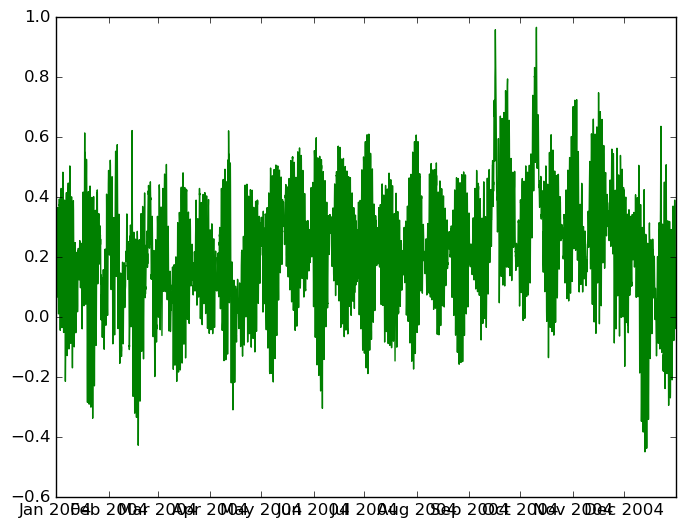

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa30e287b50>

In [48]:
plot(t,sl[:,6],"g")


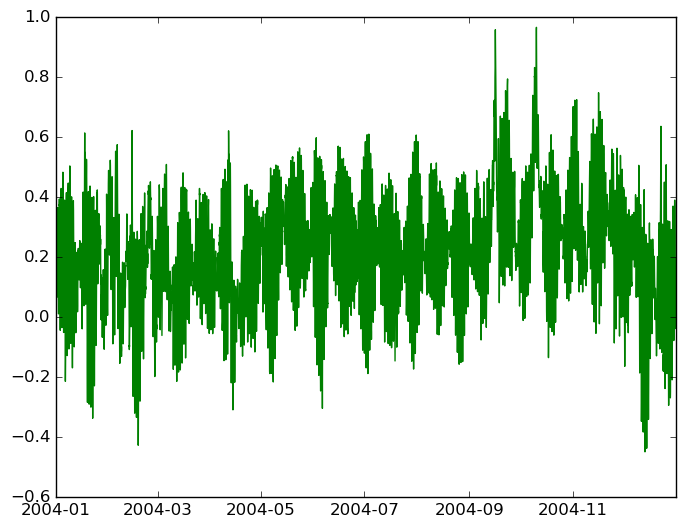

In [49]:
plot(t,sl[:,6],"g")
ax = axes()
formatter = matplotlib[:dates][:DateFormatter]("%Y-%m")
locator = matplotlib[:dates][:MonthLocator](interval=2)
ax[:xaxis][:set_major_locator](locator)
ax[:xaxis][:set_major_formatter](formatter)



In [50]:
fname = "WesternMedSST.nc";
lon = ncread(fname,"lon");
lat = ncread(fname,"lat");
time = ncread(fname,"time");
tmp = ncread(fname,"seviri_sst");
fillvalue = ncgetatt(fname,"seviri_sst","_FillValue")
SST = DataArray(tmp,tmp .== fillvalue);
mask = ncread(fname,"mask");


### Plot the first time instance of the data set with pcolor.

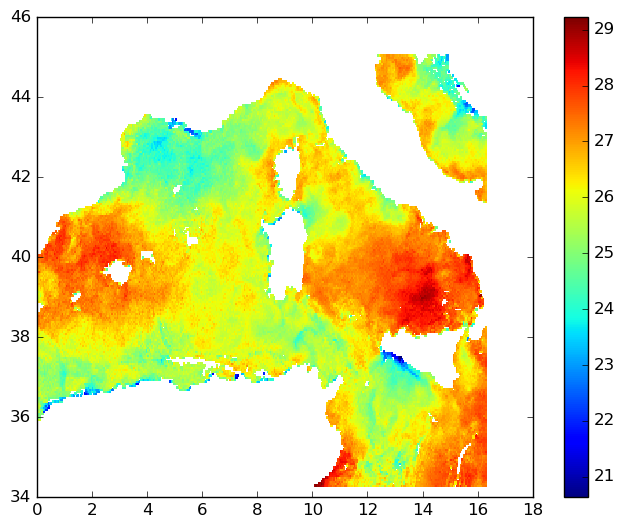

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa304852690>

In [51]:
pcolor(lon,lat,SST[:,:,1]');
colorbar()


### Plot the percentage of valid data grid point over time.

In [52]:
imax = size(SST,1)
jmax = size(SST,2)
kmax = size(SST,3)


384

In [53]:
imax, jmax, kmax = size(SST)

(327,217,384)

In [54]:
count = zeros((imax,jmax))
for j = 1:jmax
    for i = 1:imax
        for k = 1:kmax
            if !SST.na[i,j,k]
                count[i,j] = count[i,j] + 1
            end
        end

        count[i,j] = 100*count[i,j]/kmax
    end
end


In [55]:
count = 100 * squeeze(sum(!SST.na,3),3) / kmax;


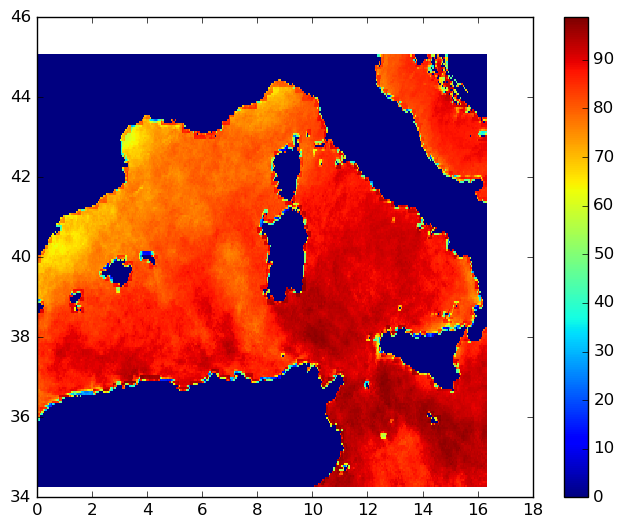

(PyObject <matplotlib.collections.PolyCollection object at 0x7fa3047392d0>,PyObject <matplotlib.colorbar.Colorbar object at 0x7fa302ea5d10>)

In [56]:
pcolor(lon,lat,count'), colorbar()


### For all time instances, what is the percentage of sea grid points not covered by clouds?

In [57]:
count = zeros(Int,(kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !SST.na[i,j,k]
                count[k] = count[k] + 1
            end
        end
    end
end


In [58]:
count[1:4]

4-element Array{Int64,1}:
 40845
 40545
 40491
 40515

In [59]:
count = squeeze(sum(sum(!SST.na,1),2),(1,2))
count[1:4]

4-element Array{Int64,1}:
 40845
 40545
 40491
 40515

In [60]:
percentage = 100 * count / sum(mask[:]);


In [61]:
dt = [DateTime(1900,1,1) + Dates.Second(round(Int64,24*60*60*_)) for _ in time];
dt[1:5]

5-element Array{DateTime,1}:
 2013-08-02T00:00:00
 2013-08-02T01:00:00
 2013-08-02T02:00:00
 2013-08-02T03:00:00
 2013-08-02T04:00:00

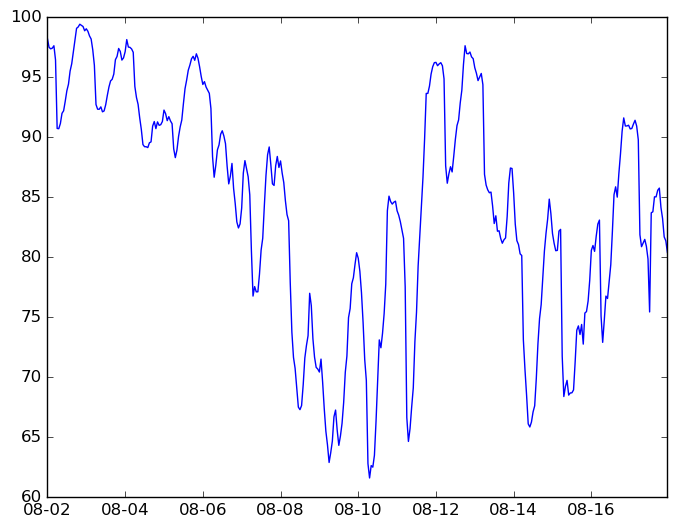

In [62]:
plot(dt,percentage)
datetick(:x,"%m-%d")


### Plot the time average of SST

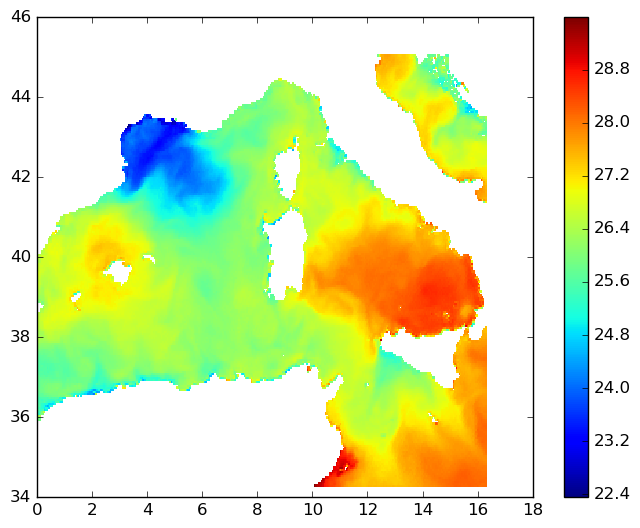

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa2fb731c50>

In [63]:
SST2 = copy(SST.data);
SST2[SST.na] = 0;
count = sum(!SST.na,3)
meanSST = DataArray(sum(SST2,3) ./ count,count .== 0);


pcolor(lon,lat,meanSST[:,:,1]');   colorbar()


### Plot the space average of SST 

* assuming that all pixels have the same area

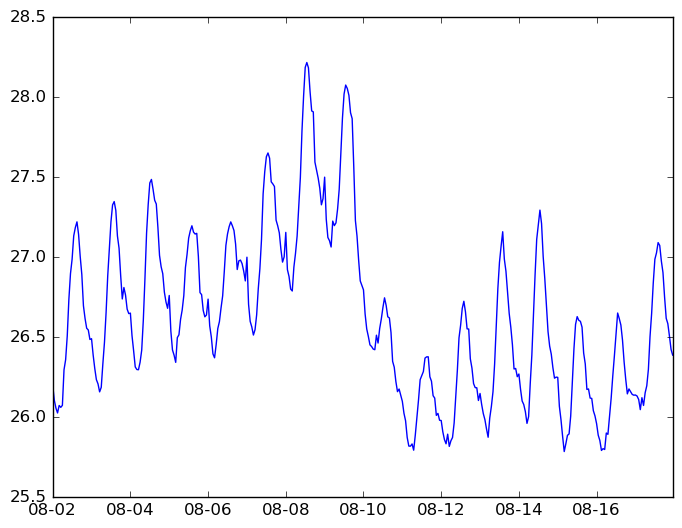

In [64]:
meanSSTt = sum(sum(SST2,1),2) ./ sum(sum(!SST.na,1),2);
meanSSTt = squeeze(meanSSTt,(1,2));
plot(dt,meanSSTt)
datetick(:x,"%m-%d")


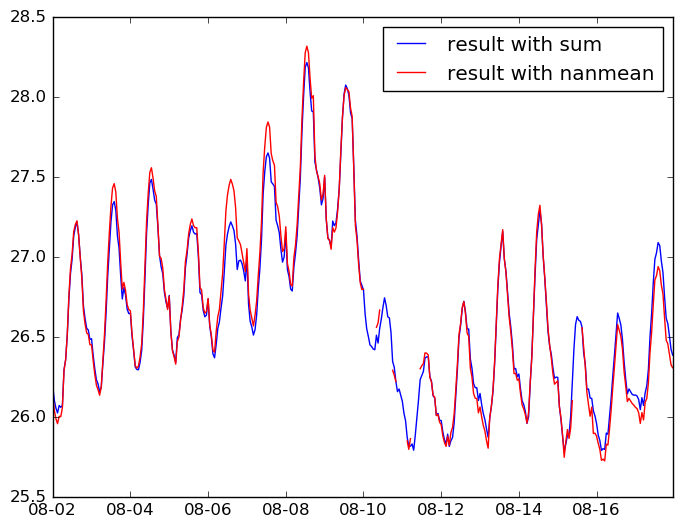

In [65]:
meanSSTt2 = mean(mean(SST,1,skipna=true),2,skipna=true)
meanSSTt2 = squeeze(meanSSTt2,(1,2));
plot(dt,meanSSTt,"b")
plot(dt,meanSSTt2,"r")
legend(["result with sum","result with nanmean"]);
datetick(:x,"%m-%d")


### Make a time serie with the number of pixels with the temperature larger than 25 degree Celsius.

In [66]:
count = zeros((kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !isna(SST[i,j,k]) && SST[i,j,k] > 25
                count[k] = count[k] + 1
            end
        end
    end
end


In [67]:
count[1:5]

5-element Array{Float64,1}:
 36399.0
 35338.0
 34948.0
 34721.0
 34993.0

In [68]:
count = sum(sum(SST .> 25,1,skipna = true),2,skipna = true);
count = squeeze(count,(1,2))


384-element Base.ReshapedArray{Int64,1,DataArrays.DataArray{Int64,3},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}}:
 36399
 35338
 34948
 34721
 34993
 34571
 32890
 34199
 34709
 35922
 36852
 37733
 38252
     ⋮
 29782
 33148
 33511
 34151
 34028
 34405
 34172
 33039
 32525
 31858
 31410
 30630

In [69]:
count[1:5]

5-element DataArrays.DataArray{Int64,1}:
 36399
 35338
 34948
 34721
 34993

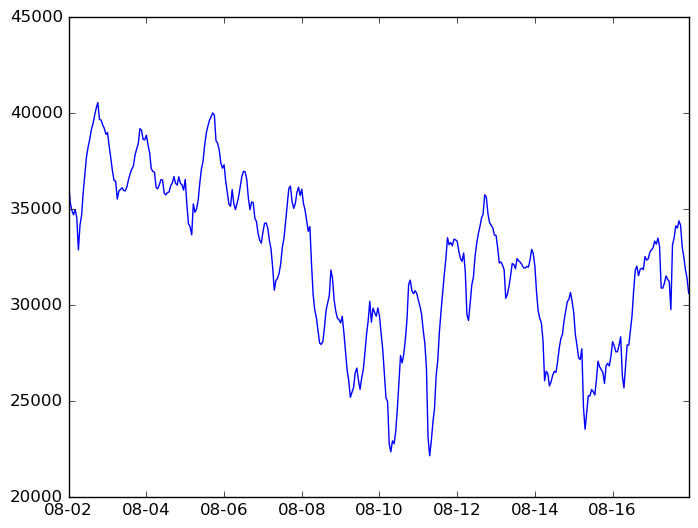

In [70]:
plot(dt,count)
datetick(:x,"%m-%d")


### Make a time serie of the area (in km2) with the temperature larger than 25 degree Celsius

In [71]:
# Earth Radius (in km)
R = 6371;
# surface of each cell
dx = pi * 0.05 * R/180;
dy = pi * 0.05 * R/180 * cos(pi*lat/180);


In [72]:
area = zeros((kmax,))
for k = 1:kmax
    for j = 1:jmax
        for i = 1:imax
            if !isna(SST[i,j,k]) && SST[i,j,k] > 25
                area[k] = area[k] + dx * dy[j]
            end
        end
    end
end


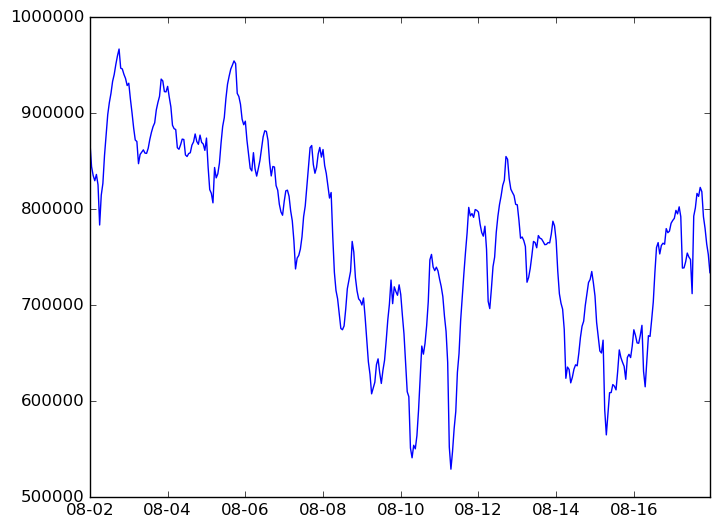

In [73]:
plot(dt,area)
datetick(:x,"%m-%d")
